# DFT

Q1 Write a function to compute the circular convolution of two sequences. Find the circular convolution of
x = [1, 2, 3, 0, 0, 0, 0] and h = [1, 1, 1, 1, 1, 1, 1] using the function.

In [162]:
import numpy as np
import matplotlib.pyplot as plt
def cir_conv(x,h):
    inputSeq=x
    impulseResponse=h
    m=len(inputSeq)
    n=len(impulseResponse)
    p=max(m,n)
    L=m+n-1
    OutputSeq=[]
    inputSeq=np.pad(inputSeq,(0,L-m),'constant')
    impulseResponse=np.pad(impulseResponse,(0,L-n),'constant')
    
    for n in range(0,L):
        total_sum=0
        for k in range(0,L):
            if n>=k:
                 total_sum=total_sum+inputSeq[n-k]*impulseResponse[k]
        OutputSeq.append(total_sum)
        
    for i in  range(L-p):
        OutputSeq[i]=OutputSeq[i]+OutputSeq[p+i]
       
    return OutputSeq[0:p]   
h = [1, 1, 1, 1, 1, 1, 1]
x=[1, 2, 3, 0, 0, 0, 0]
out=cir_conv(x,h)
print('circular convolution of h[n] and x[n] = '+str(out))


circular convolution of h[n] and x[n] = [6, 6, 6, 6, 6, 6, 6]


Q2. Consider the two sequences x = [1, −3, 1, 5] and y = [7, −7, −9, −3]. Does there exist a sequence h such that y is  
the circular convolution of x and h. Find h using DFT and IDFT.

In [163]:
import numpy as np
import matplotlib.pyplot as plt

def dft_cofficent(x,N):
    a=[]
    for k in range(0,N):
        total=0
        for i in range(0,N):
            total=total+x[i]*np.exp((-1j*k*2*np.pi*i)/N)
        a.append(round(total,2))
        
    return a 
y=[1,-3,1,5]
x=[7,-7,-9,-3]
n=np.arange(0,4,1)
X=dft_cofficent(x,4)  
Y=dft_cofficent(y,4)
print('DFT of x[n] is = '+str(X))
print('DFT of y[n] is = '+str(Y))

DFT of x[n] is = [(-12+0j), (16+4j), (8-0j), (16-4j)]
DFT of y[n] is = [(4+0j), (-0+8j), -0j, -8j]


In [164]:
#for finding h using IDFT from dft of X and Y
# Y=HX
# H=Y/X
H=[]
for i in range(0,4):
    H.append(round(Y[i]/X[i],2))

In [165]:
#for finding h[n] in discrte time domain
def inverse_dft(N,y):
    a=[]
    for n in range(N):
        total=0
        for i in range(N):
            total=total+y[i]*np.exp((1j*n*2*np.pi*i)/N)
        a.append(round((total.real/N),2))
        
    return a 
N=4

signal=inverse_dft(N,H)
print(' h[n] is ='+str(signal))

 h[n] is =[-0.02, -0.32, -0.14, 0.15]


Q3.  A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is sampledat 100 times per second for 10 seconds and
then its DFT is computed. Plotthe spectrum versus frequency in Hz. What is the magnitude of DFT at35 Hz? Is this value
non-zero? If so then why?

magnitude at 35 Hz is = 2.048243149628481


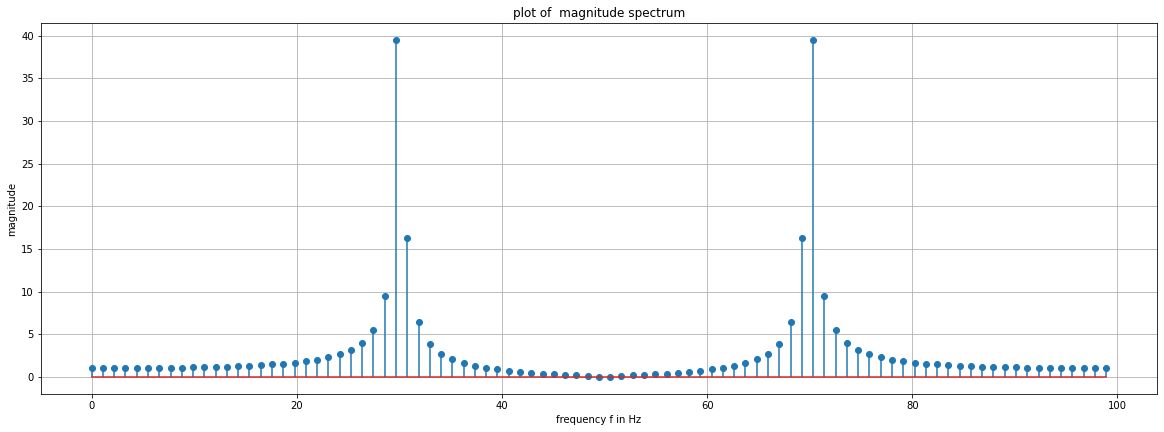

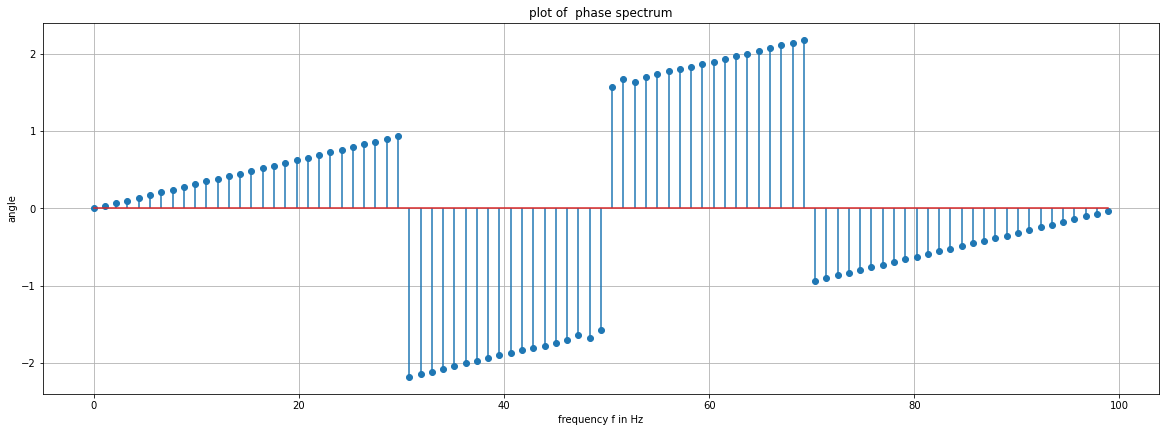

In [166]:
f1=30
fs=100
T=0.91
N=int(T*fs)
t=np.arange(0,N,1/fs)
signal=np.cos(2*np.pi*f1*t)
n=np.arange(0,N)
f=(n*fs)/N

dft=dft_cofficent(signal,N)
y=[np.abs(dft),np.angle(dft)]
title=['magnitude spectrum','phase spectrum']
y_label=['magnitude','angle']
for i in range(2):
    fig= plt.figure(figsize=(20,15))
    plt.subplot(2,1,i+1)
    plt.stem(f,y[i],use_line_collection=True)
    plt.title('plot of  '+str(title[i]))
    plt.ylabel(str(y_label[i]))
    plt.xlabel('frequency f in Hz')
    plt.grid()
# wehave to find magintude at f=35 Hz
mag=np.abs(dft)[np.round(f)==35][0]
print('magnitude at 35 Hz is = '+str(mag))

Q4. Compute the energy of the signal x[n] = (3/4)nu[n] for 0 ≤ n ≤ 50. If the DFT of this signal is X(k) then what is the
energy of X(k) and how doesit relate to that of x[n].

In [167]:
x=(3/4)**n
N=50
energy=0
for n in range(0,N):
    energy=energy +((0.75**n)**2)
print('energy of x[n] in time domain is = '+str(np.round(energy,2)))   
    

energy of x[n] in time domain is = 2.29


In [168]:

x=[]
energy=0
for n in range(0,51):
    x.append((0.75)**n)
n=np.arange(0,51,1)
X=dft_cofficent(x,50) 
X=np.asarray(X)
energy=np.sum(np.square(abs(X)))/N
print('energy of x[n] calculating from dft coeffiecrnt  is = '+str(np.round(energy,2)))

energy of x[n] calculating from dft coeffiecrnt  is = 2.28


Q5. Is it possible to compute the DTFS coefficients of the square wave mentioned in Assignment-3 using the function writte
for DFT as mentionedabove. If yes, then modify the function to compute the DTFS coefficientsof the signal and show a labelled
plot of the spectrum of these coefficients

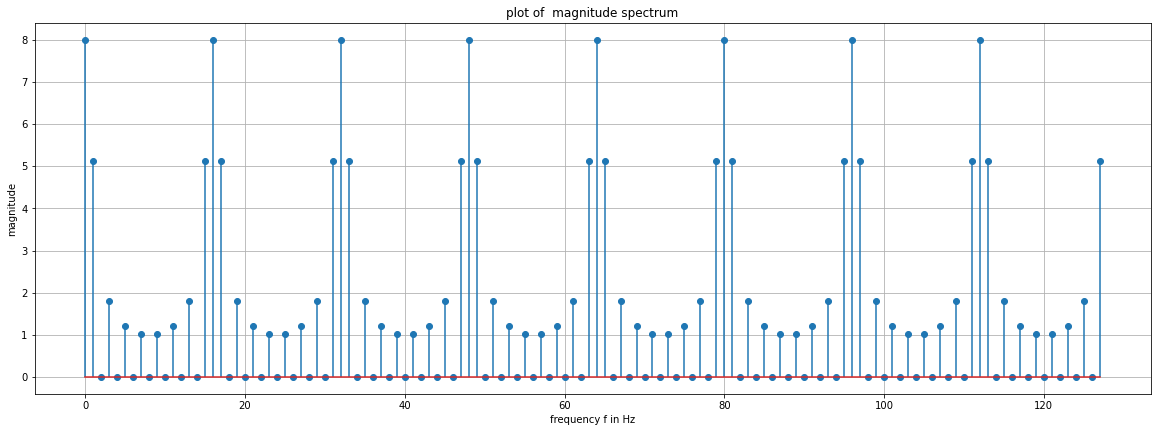

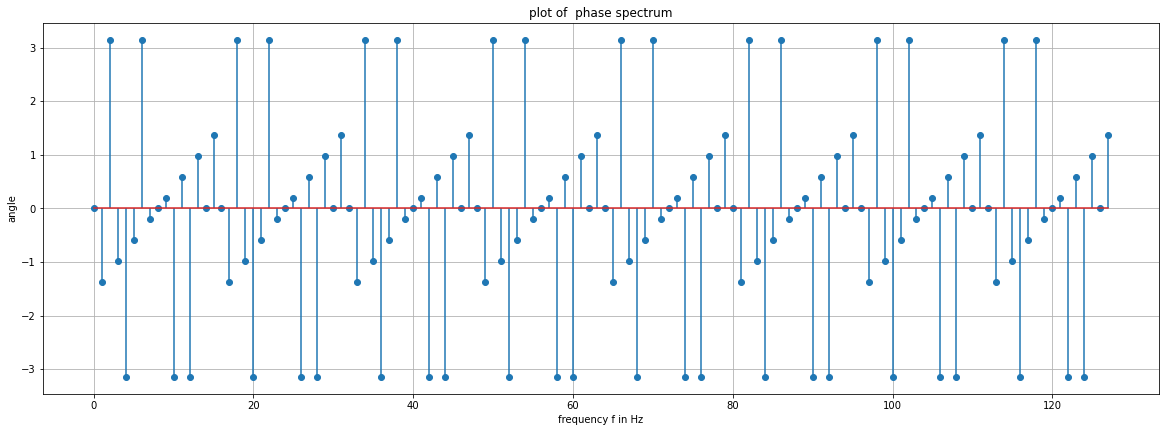

In [169]:
# funtion for finding dtfs cofficent
def modified_dtfs(x,N):
    a=[]
    for k in range(0,N):
        total=0
        for i in range(0,N):
            total=total+x[i]*np.exp((-1j*k*2*np.pi*i)/N)
        a.append(round(total,2))
    return a      

N=16
x=[]
n=np.arange(0,128,1)
for i in range(N):
    if i>=0 and i<=7:
        x.append(1)
    else:
        x.append(0)
        
dtfs=modified_dtfs(x,N) 
for i in range(3):
    dtfs.extend(dtfs)
Y=[np.abs(dtfs),np.angle(dtfs)]
title=['magnitude spectrum','phase spectrum']

#ploting the dtfs spectrum
for i in range(2):
    fig= plt.figure(figsize=(20,15))
    plt.subplot(2,1,i+1)
    plt.stem(n,Y[i],use_line_collection=True)
    plt.title('plot of  '+str(title[i]))
    plt.ylabel(str(y_label[i]))
    plt.xlabel('frequency f in Hz') 
    plt.grid()
        

# DCT

Q1 Consider a signal x[n] = [8, 16, 24, 32, 40, 48, 56, 64] of length N = 8. Compute the DCT of this signal

In [170]:
def dct(N,x,c):
    X=[]
    for m in range(0,N):
        total=0
        for n in range(0,N):
            total=total+ x[n]*c[m]*np.cos((np.pi*m*(2*n +1))/(2*N))
        X.append(round(total*np.sqrt(2/N),2))  
    return X
x=[8,16,24,32,40,48,56,64]
c=[1/np.sqrt(2),1,1,1,1,1,1,1]
N=8
result=dct(N,x,c)
print("DCT cofficent of x[n] is = "+str(result))        

DCT cofficent of x[n] is = [101.82, -51.54, -0.0, -5.39, 0.0, -1.61, -0.0, -0.41]


Q2 keep only the first four DCT coefficients while discarding the rest and then compare its energy with that of x[n].

In [171]:
#now we take only four cofficent
energy=0
for i in range(4):
    energy=energy+(result[i])**2
print('energy of input signal x[n] in time domain = '+str(np.sum(np.square(x))))    
print('energy of input signal of DCT cofficent = '+str(energy))    

energy of input signal x[n] in time domain = 13056
energy of input signal of DCT cofficent = 13052.7361


energy of DCT cofficent and time domain is almost same, so energy in conserve in this case.

Q3 Compute the inverse DCT of the sequence obtained and plot it alongsidex[n]. Also compute the
mean square error between the two signals.

inverse DCT  is :[15.16, 28.63, 39.78, 48.24, 52.74, 51.59, 43.5, 27.6]


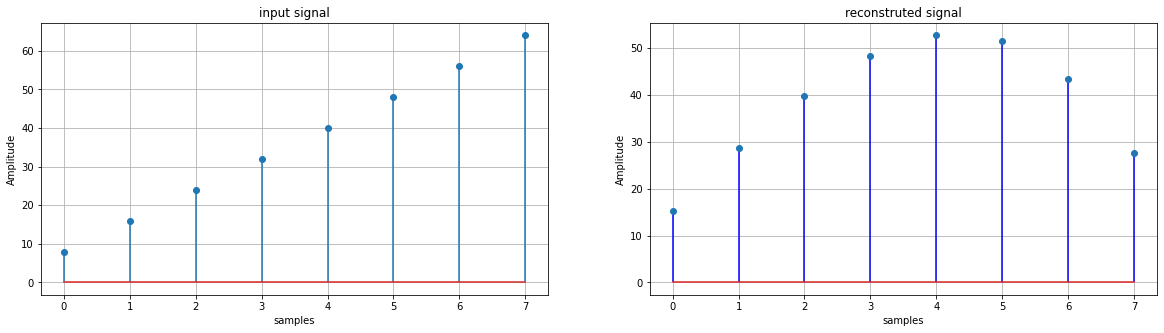

In [172]:
def inversedct(N,x,c):
    X=[]
    for n in range(N):
        total=0
        for m in range(N):
            total=total+ x[m]*c[m]*np.cos(((np.pi*m)/(2*N))*(2*n+1))
        X.append (total*np.sqrt(2/N))
    return X
c=[1/np.sqrt(2),1,1,1,1,1,1,1]
N=8
out=dct(N,result,c)
print('inverse DCT  is :'+str(out))
x=[8,16,24,32,40,48,56,64]
fig= plt.figure(figsize=(20,5))
n=np.arange(0,8,1)
plt.subplot(1,2,1)
plt.stem(n,x,use_line_collection=True)
plt.ylabel('Amplitude')
plt.xlabel('samples')
plt.title('input signal')
plt.grid()
plt.subplot(1,2,2)
plt.stem(n,out,'b',use_line_collection=True)
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.xlabel('samples')
plt.title('reconstruted signal')
#plt.title('square wave and approximate reconstruction of the square wave')
plt.ylabel('Amplitude')
plt.xlabel('samples')
plt.grid()

In [173]:
#mean square error 
mean_square_error=0
for i in range(N):
    mean_square_error= mean_square_error + (x[i]-out[i])**2
print('mean square error is :'+str( mean_square_error/N))        

mean square error is :297.49177499999996


Q4. Repeat the same process with DFT and compare the mean squareerrors. Comment on your observations.

In [174]:

n=np.arange(0,8,1)
N=8
x=[8,16,24,32,40,48,56,64]
out=dft_cofficent(x,N) 
X=np.asarray(out)
print("DFT cofficent are ="+str(X))

DFT cofficent are =[288. +0.j   -32.+77.25j -32.+32.j   -32.+13.25j -32. -0.j   -32.-13.25j
 -32.-32.j   -32.-77.25j]


[8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0]


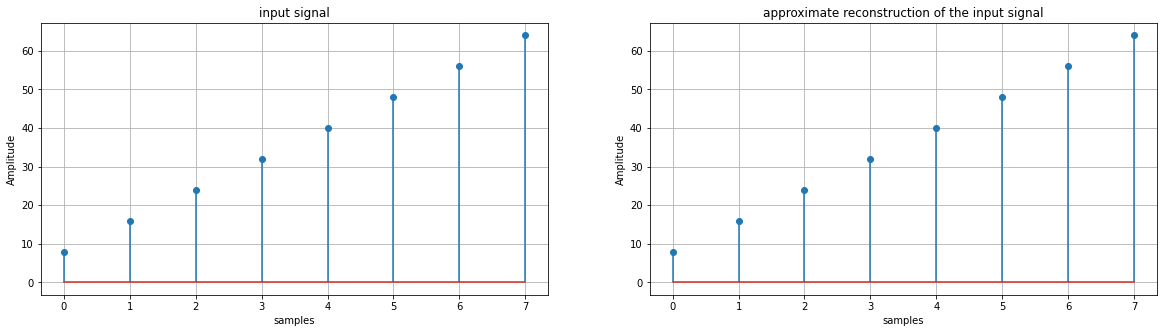

In [175]:

n=np.arange(0,8,1)
signal=inverse_dft(8,X)
print(signal)

fig= plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.stem(x,use_line_collection=True)
plt.title('input signal')
plt.ylabel('Amplitude')
plt.xlabel('samples')
plt.grid()
plt.subplot(1,2,2)
plt.stem(n,signal,use_line_collection=True)
plt.title('approximate reconstruction of the input signal')
plt.ylabel('Amplitude')
plt.xlabel('samples')
plt.grid()

In [176]:
#calcualting mean square error in dft case
mean_square_error=0
for i in range(N):
    mean_square_error= mean_square_error + (x[i]-abs(signal[i]))**2
print('mean square error is :'+str( mean_square_error/N))   

mean square error is :0.0


In [177]:
#energy in dft case
dft_cofficent=X[0:4]
energy=np.sum(np.square(abs(dft_cofficent)))/N
print('energy of dft cofficent of signal = '+str(energy))
print('energy of input signal x[n] in time domain = '+str(np.sum(np.square(x)))) 

energy of dft cofficent of signal = 11647.890625
energy of input signal x[n] in time domain = 13056
